# Tính Jaccard thì ở file còn lại ImageClustering

In [59]:
import numpy as np
data=np.load('embedd.npy')

In [65]:
data2=np.load('2embedding_dat.npy')

In [8]:
data.shape

(10000, 513)

In [66]:
embedding=data2

In [10]:
real_label=data[:,-1]

In [11]:
all_labels=list(real_label)

In [12]:
import pandas as  pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
import matplotlib.pyplot as plt
plt.clf()
plt.style.use('seaborn')

<Figure size 432x288 with 0 Axes>

# Load và đặt tên các biến embedding

In [74]:
embedding_resnet18 = np.load('embedding_dat.npy')
embedding_AE = np.load('codes.npy')
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
embedding_rawdata = x_test.reshape(10000,3072)

# Elbow for Kmeans

In [1]:
def Elbow(embedding,nber_cluster):
    kmeans = KMeans(n_clusters = nber_cluster, random_state=0).fit(embedding)
    Elbow_score=kmeans.inertia_
    return Elbow_score

In [13]:
def Elbow_survey(embedding,min_cluster,max_cluster):
    lst_elbow=[]
    for nber_cluster in range(min_cluster,max_cluster+1):
        kmeans = KMeans(n_clusters = nber_cluster, random_state=0).fit(embedding)
        Elbow_score=kmeans.inertia_
        lst_elbow.append(Elbow_score)
    return lst_elbow

In [20]:
def visulization_Elbow(lembedding,min_cluster,max_cluster):
    lst_elbow = Elbow_survey(embedding,min_cluster,max_cluster)
    plt.plot([i for i in range(min_cluster,max_cluster+1)],lst_elbow,'o--')
    plt.xlabel('Cluster',fontsize=15)
    plt.ylabel('Elbow',fontsize=15)
    plt.yticks(fontsize=15 )
    plt.xticks([i for i in range(min_cluster,max_cluster+1)],fontsize=15 )
    #plt.text(1.5,3.3,'Not care line',size=20)
    #plt.text(9,7.3,'Care line',size=20)
    #plt.legend(loc=2, prop={'size': 20})
    plt.title('Elbow survey',fontsize=20)
    plt.savefig('Elbow survey.png')
    plt.show()
    return lst_elbow

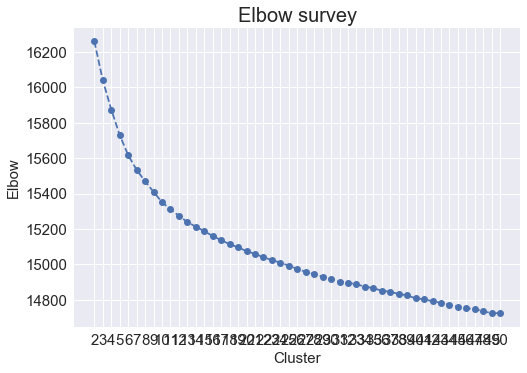

In [21]:
lst_elbow = visulization_Elbow(embedding,2,50)

In [27]:
np.save('resnet18_Kmeans_cluster_2_to_50_elbow.npy',np.array(lst_elbow))

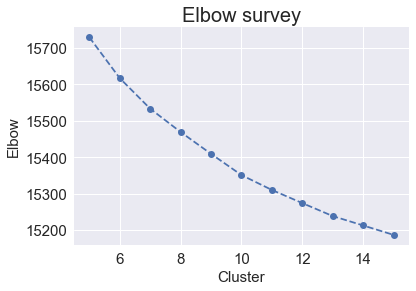

In [80]:
plt.plot([i for i in range(5,16)],lst_elbow[3:14],'o--')
plt.xlabel('Cluster',fontsize=15)
plt.ylabel('Elbow',fontsize=15)
plt.yticks(fontsize=15 )
plt.xticks(fontsize=15 )
#plt.text(1.5,3.3,'Not care line',size=20)
#plt.text(9,7.3,'Care line',size=20)
#plt.legend(loc=2, prop={'size': 20})
plt.title('Elbow survey',fontsize=20)
plt.savefig('Elbow survey_resnet18.png')
plt.show()

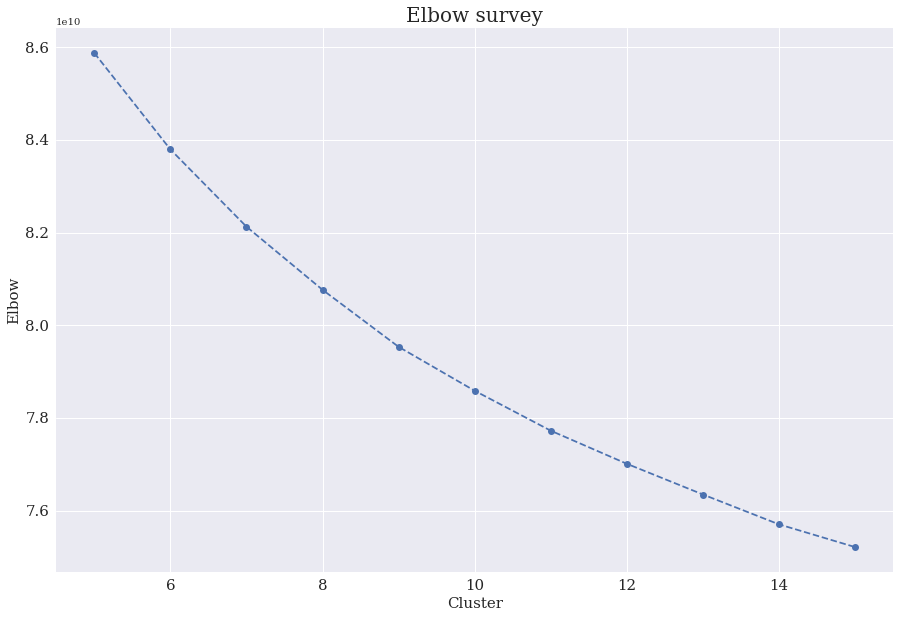

In [199]:
lst_elbow_rawdata = Elbow_survey(embedding_rawdata,5,15)
plt.plot([i for i in range(5,16)],lst_elbow_rawdata,'o--')
plt.xlabel('Cluster',fontsize=15)
plt.ylabel('Elbow',fontsize=15)
plt.yticks(fontsize=15 )
plt.xticks(fontsize=15 )
#plt.text(1.5,3.3,'Not care line',size=20)
#plt.text(9,7.3,'Care line',size=20)
#plt.legend(loc=2, prop={'size': 20})
plt.title('Elbow survey',fontsize=20)
plt.savefig('Elbow survey_rawdata.png')
plt.show()

In [200]:
lst_elbow_rawdata

[85873686871.82169,
 83793536285.70541,
 82126669335.89247,
 80764472187.98517,
 79534214934.89989,
 78586328194.99228,
 77725128242.18501,
 77011344360.38419,
 76349184354.70633,
 75704767741.38004,
 75214995522.23167]

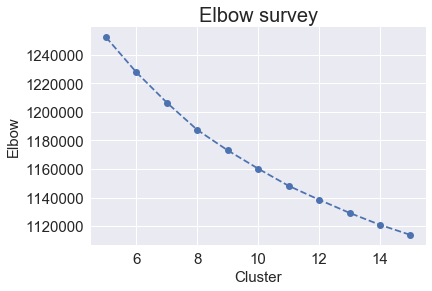

In [82]:
lst_elbow_AE = Elbow_survey(embedding_AE,5,15)
plt.plot([i for i in range(5,16)],lst_elbow_AE,'o--')
plt.xlabel('Cluster',fontsize=15)
plt.ylabel('Elbow',fontsize=15)
plt.yticks(fontsize=15 )
plt.xticks(fontsize=15 )
#plt.text(1.5,3.3,'Not care line',size=20)
#plt.text(9,7.3,'Care line',size=20)
#plt.legend(loc=2, prop={'size': 20})
plt.title('Elbow survey',fontsize=20)
plt.savefig('Elbow survey_AE.png')
plt.show()

# Elbow for GMM


# Silhouette for Kmeans - cx phải khảo sát số clustering
Cần 2 file:
* File embedding
* FIle .npy về array_index_clus

In [28]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [31]:
def Silhouette_survey(embedding,min_cluster,max_cluster):
    lst_silhouette=[]
    for nber_cluster in range(min_cluster,max_cluster+1):
        clusterer = KMeans(n_clusters=nber_cluster, random_state=10)
        cluster_labels = clusterer.fit_predict(embedding)
        silhouette_avg = silhouette_score(embedding, cluster_labels)
        lst_silhouette.append(silhouette_avg)
    return lst_silhouette

In [40]:
lst_silhouette = Silhouette_survey(embedding,2,50)

In [67]:
lst_silhouette2 = Silhouette_survey(embedding,5,15)

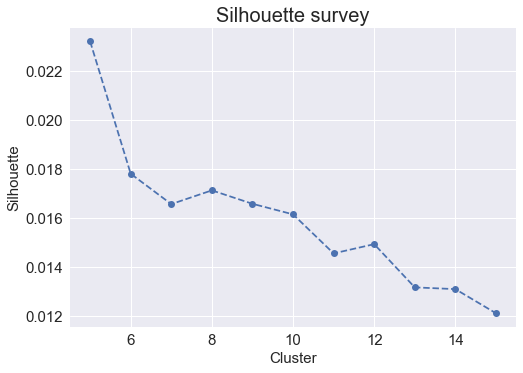

In [68]:
plt.plot([i for i in range(5,16)],lst_silhouette2,'o--')
plt.xlabel('Cluster',fontsize=15)
plt.ylabel('Silhouette',fontsize=15)
plt.yticks(fontsize=15 )
plt.xticks(fontsize=15 )
plt.title('Silhouette survey',fontsize=20)
plt.savefig('Silhouette survey.png')
plt.show()

## Ở trên là tính Silhouette với các vector embedding, giờ cần tính Silhouette với raw image dựa trên kết quả phân cụm với Silhouette
* Với đầu vào là embedding của raw data (flatten) và clusters

In [53]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
embedding_rawdata=x_test.reshape(10000,3072)

In [54]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [57]:
embedding_rawdata=x_test.reshape(10000,3072)

In [58]:
cluster_labels = np.load('cluster_index_array_DAT.npy')

In [62]:
silhouette_avg = silhouette_score(embedding, cluster_labels)
silhouette_avg

0.01890785865069509

In [64]:
clusterer = KMeans(n_clusters=10, random_state=10)
cluster_labels = clusterer.fit_predict(embedding_rawdata)
silhouette_avg = silhouette_score(embedding_rawdata, cluster_labels)
silhouette_avg

0.04932186681357764

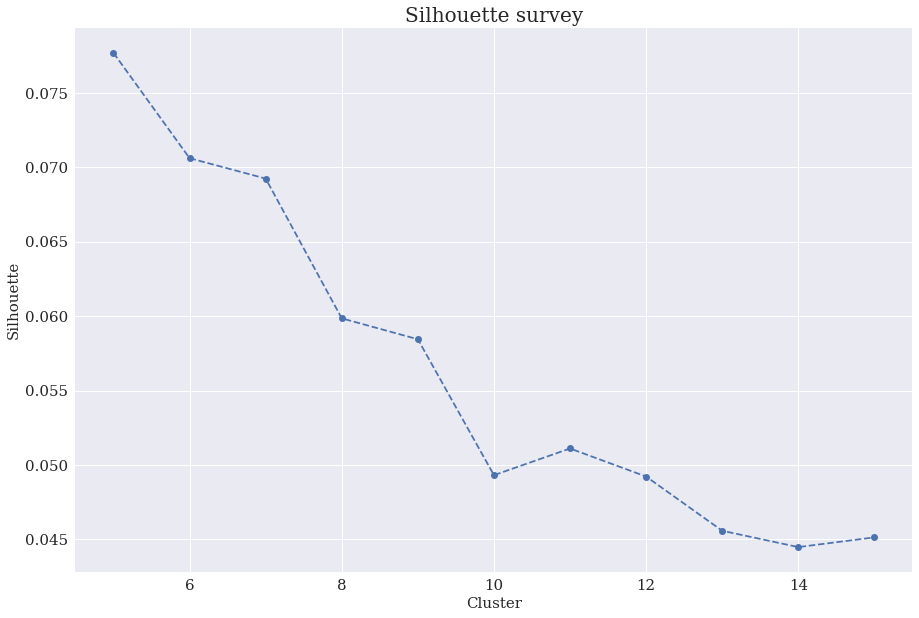

In [197]:
lst_silhouette3 = Silhouette_survey(embedding_rawdata,5,15)
plt.plot([i for i in range(5,16)],lst_silhouette3,'o--')
plt.xlabel('Cluster',fontsize=15)
plt.ylabel('Silhouette',fontsize=15)
plt.yticks(fontsize=15 )
plt.xticks(fontsize=15 )
plt.title('Silhouette survey',fontsize=20)
plt.savefig('Silhouette survey_rawdataa.png')
plt.show()

In [198]:
lst_silhouette3

[0.07769753920703036,
 0.07062209010315645,
 0.06925304008382031,
 0.059859538719381905,
 0.05845363802187894,
 0.04932186681357764,
 0.05111390492297073,
 0.04922791498027309,
 0.045584480410363074,
 0.04448783566596268,
 0.045141936032799604]

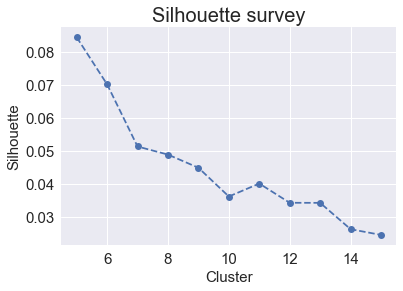

In [77]:
lst_silhouette3 = Silhouette_survey(embedding_AE,5,15)
plt.plot([i for i in range(5,16)],lst_silhouette3,'o--')
plt.xlabel('Cluster',fontsize=15)
plt.ylabel('Silhouette',fontsize=15)
plt.yticks(fontsize=15 )
plt.xticks(fontsize=15 )
plt.title('Silhouette survey',fontsize=20)
plt.savefig('Silhouette survey_AE.png')
plt.show()

In [72]:
import seaborn as sns

%matplotlib inline

# Jaccard:
* cho 2 file result.pickle và result_origin.pickle

In [52]:
def Jaccard_score(clusters,all_labels):
    nber_real_class = len(set(all_labels))
    nber_clusters = len(set(clusters))
    dct_class={}#dictionary consist of list order of index of each label in range(10000) 
    for i in list(set(all_labels)):
        temp=[j for j,label in enumerate(all_labels) if label == i]
        dct_class[i] = temp
    dct_cluster={}# dictionary of list index of each cluster
    for i in list(set(clusters)):
        temp=[j for j,label in enumerate(clusters) if label == i]
        dct_cluster[i] = temp
    matrix_Jaccard=np.zeros((nber_real_class,nber_clusters))
    for i in range(len(list(set(all_labels)))):
        for j in range(len(list(set(clusters)))):
            matrix_Jaccard[i,j] = Jaccard_index_formular(dct_class[list(set(all_labels))[i]],
            dct_cluster[list(set(clusters))[j]])
    cluster_closest_labels = [list(set(clusters))[j] for j in list(np.argmax(matrix_Jaccard,axis = 1))]
    label_closest_cluster =  [list(set(all_labels))[j] for j in list(np.argmax(matrix_Jaccard,axis = 0))]
    print("thu tu label:",list(set(all_labels)))
    print("cac label gan voi cluster theo thu tu:",cluster_closest_labels)
    print("JC index tuong ung:\n",list(np.max(matrix_Jaccard,axis = 1)))
    print("-----000------")
    print("thu tu cluster:",list(set(clusters)))
    print("cac cluster gan voi cac label theo thu tu:",label_closest_cluster)
    print("JC index tuong ung:\n",list(np.max(matrix_Jaccard,axis = 0)))
    print("*********")
    print("matrix Jaccard:\n",np.array(matrix_Jaccard))
    return matrix_Jaccard
def Jaccard_index_formular(set1,set2):
    a=set(set1)
    b=set(set2)
    T= len(a & b)
    M= len(a | b)
    return T/M


In [70]:
#sửa chỗ embedding đã
kmeans = KMeans(n_clusters=10, random_state=0).fit(embedding_rawdata)
clusters=list(kmeans.labels_)
matrix_JC=Jaccard_score(clusters,all_labels)

thu tu label: [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]
cac label gan voi cluster theo thu tu: [6, 8, 2, 0, 2, 8, 4, 0, 9, 1]
JC index tuong ung:
 [0.14961725817675714, 0.08796546141392336, 0.11049210770659239, 0.08271534512264689, 0.10894761242466389, 0.10163934426229508, 0.1320113314447592, 0.08086560364464693, 0.18281653746770027, 0.1649269311064718]
-----000------
thu tu cluster: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
cac cluster gan voi cac label theo thu tu: [4.0, 9.0, 2.0, 4.0, 6.0, 9.0, 0.0, 0.0, 5.0, 8.0]
JC index tuong ung:
 [0.09394812680115273, 0.1649269311064718, 0.11049210770659239, 0.1032885595182955, 0.1320113314447592, 0.08133971291866028, 0.14961725817675714, 0.14367816091954022, 0.10163934426229508, 0.18281653746770027]
*********
matrix Jaccard:
 [[0.01660418 0.04592315 0.02134927 0.01707942 0.01782985 0.0523865
  0.14961726 0.14367816 0.04510109 0.07579318]
 [0.02872629 0.08507535 0.04045237 0.06244425 0.06050955 0.04994193
  0.03379224 0.01588202 0.08796546 0.0541

In [86]:
24**0.5

4.898979485566356

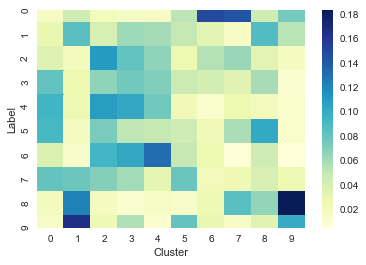

In [73]:
lst=[[i,j,matrix_JC[i][j]] for i in range(10) for j in range(10)]
import pandas as pd 
df = pd.DataFrame(lst, columns =['Label', 'Cluster','Jaccard_score'])
df2 = df.pivot('Label', 'Cluster','Jaccard_score')
ax = sns.heatmap(df2, cmap="YlGnBu")
#Sửa tên hình đã
ax.figure.savefig('JC-heatmap_rawdata.png')

In [75]:
#sửa chỗ embedding đã
kmeans = KMeans(n_clusters=10, random_state=0).fit(embedding_AE)
clusters=list(kmeans.labels_)
matrix_JC=Jaccard_score(clusters,all_labels)

thu tu label: [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]
cac label gan voi cluster theo thu tu: [2, 9, 5, 6, 5, 0, 6, 8, 7, 8]
JC index tuong ung:
 [0.2471812662619254, 0.25274725274725274, 0.09495548961424333, 0.10508215513947268, 0.14647137150466044, 0.13518299881936247, 0.15081575805809788, 0.13048498845265588, 0.2325895875591616, 0.2368919772583702]
-----000------
thu tu cluster: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
cac cluster gan voi cac label theo thu tu: [5.0, 5.0, 0.0, 0.0, 8.0, 6.0, 6.0, 8.0, 9.0, 1.0]
JC index tuong ung:
 [0.13518299881936247, 0.08429752066115702, 0.2471812662619254, 0.12982456140350876, 0.1836596893990547, 0.148, 0.15081575805809788, 0.2325895875591616, 0.2368919772583702, 0.25274725274725274]
*********
matrix Jaccard:
 [[0.00839014 0.03252886 0.24718127 0.12982456 0.0560241  0.0066251
  0.01795143 0.         0.00102249 0.16392513]
 [0.03165236 0.03090623 0.02058197 0.0529758  0.04656716 0.01893491
  0.08274055 0.         0.00564972 0.25274725]
 [0.033870

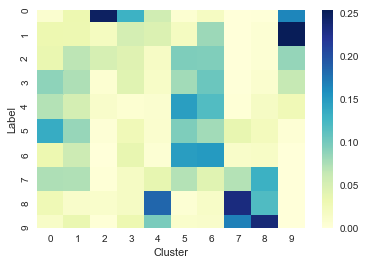

In [76]:
lst=[[i,j,matrix_JC[i][j]] for i in range(10) for j in range(10)]
import pandas as pd 
df = pd.DataFrame(lst, columns =['Label', 'Cluster','Jaccard_score'])
df2 = df.pivot('Label', 'Cluster','Jaccard_score')
ax = sns.heatmap(df2, cmap="YlGnBu")
#Sửa tên hình đã
ax.figure.savefig('JC-heatmap_AE.png')

# Load file to visualization

### Raw data

In [83]:
def get_index_point_of_cluster(clusters,all_labels):
    nber_real_class = len(set(all_labels))
    nber_clusters = len(set(clusters))
    dct_class={}#dictionary consist of list order of index of each label in range(10000) 
    for i in list(set(all_labels)):
        temp=[j for j,label in enumerate(all_labels) if label == i]
        dct_class[i] = temp
    dct_cluster={}# dictionary of list index of each cluster
    for i in list(set(clusters)):
        temp=[j for j,label in enumerate(clusters) if label == i]
        dct_cluster[i] = temp
    matrix_Jaccard=np.zeros((nber_real_class,nber_clusters))
    for i in range(len(list(set(all_labels)))):
        for j in range(len(list(set(clusters)))):
            matrix_Jaccard[i,j] = Jaccard_index_formular(dct_class[list(set(all_labels))[i]],
            dct_cluster[list(set(clusters))[j]])
    return dct_cluster

In [84]:
#cần sửa embedding
kmeans = KMeans(n_clusters=10, random_state=0).fit(embedding_rawdata)
clusters=list(kmeans.labels_)
centroids = kmeans.cluster_centers_
dct_cluster = get_index_point_of_cluster(clusters,all_labels)
lst_distance=[]
for i in range(10):
    #có chỗ cần sửa
    lst_temp=[np.linalg.norm(centroids[i]-embedding_rawdata[j]) for j in dct_cluster[i]]
    lst_distance.append(lst_temp)
s=np.array(lst_distance)
#SỬA TÊN ĐÃ
np.save('distances_to_centroid_raw_data.npy', s)
np.save('cluster_index_array_raw_data.npy',np.array(clusters))

c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  # This is added back by InteractiveShellApp.init_path()


## AE

In [85]:
#cần sửa embedding
kmeans = KMeans(n_clusters=10, random_state=0).fit(embedding_AE)
clusters=list(kmeans.labels_)
centroids = kmeans.cluster_centers_
dct_cluster = get_index_point_of_cluster(clusters,all_labels)
lst_distance=[]
for i in range(10):
    #có chỗ cần sửa
    lst_temp=[np.linalg.norm(centroids[i]-embedding_AE[j]) for j in dct_cluster[i]]
    lst_distance.append(lst_temp)
s=np.array(lst_distance)
#SỬA TÊN ĐÃ
np.save('distances_to_centroid_AE.npy', s)
np.save('cluster_index_array_AE.npy',np.array(clusters))

c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  # This is added back by InteractiveShellApp.init_path()


## Bắt đầu sử dụng kết quả GMM

## Raw data

### Silhouette

In [89]:
import pickle

with open('results_original.pkl', 'rb') as f:
    gmm_rawdata = pickle.load(f)


In [97]:
lst_sil=[gmm_rawdata[i][1]['gmm'] for i in range(5,15)]

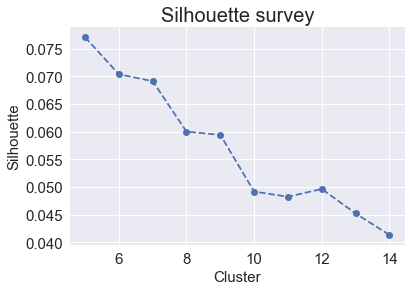

In [99]:

plt.plot([i for i in range(5,15)],lst_sil,'o--')
plt.xlabel('Cluster',fontsize=15)
plt.ylabel('Silhouette',fontsize=15)
plt.yticks(fontsize=15 )
plt.xticks(fontsize=15 )
plt.title('Silhouette survey',fontsize=20)
plt.savefig('Silhouette survey_GMM_rawdata.png')
plt.show()

### Jaccard

In [114]:
cluster_GMM_rawdata=list(gmm_rawdata[10][0]['gmm'])

In [115]:
matrix_JC=Jaccard_score(cluster_GMM_rawdata,all_labels)

thu tu label: [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]
cac label gan voi cluster theo thu tu: [9, 3, 2, 0, 2, 3, 4, 2, 1, 7]
JC index tuong ung:
 [0.15031757233592097, 0.08837707552222818, 0.11002227171492204, 0.08144796380090498, 0.10706352732119058, 0.10374796306355241, 0.12272460364063417, 0.08206686930091185, 0.18604651162790697, 0.17051416579223505]
-----000------
thu tu cluster: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
cac cluster gan voi cac label theo thu tu: [4.0, 8.0, 2.0, 5.0, 6.0, 9.0, 6.0, 9.0, 0.0, 0.0]
JC index tuong ung:
 [0.09821941412981046, 0.18604651162790697, 0.11002227171492204, 0.10374796306355241, 0.12272460364063417, 0.07789855072463768, 0.10921985815602837, 0.17051416579223505, 0.1371571072319202, 0.15031757233592097]
*********
matrix Jaccard:
 [[0.0164806  0.07620164 0.0221493  0.04796287 0.0164806  0.05621302
  0.01690507 0.0439869  0.13715711 0.15031757]
 [0.02961766 0.05577918 0.04224174 0.08837708 0.05752212 0.04938272
  0.06346328 0.08248423 0.01899441 0

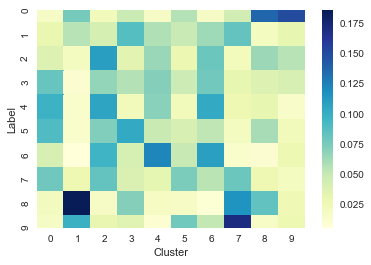

In [116]:
lst=[[i,j,matrix_JC[i][j]] for i in range(10) for j in range(10)]
import pandas as pd 
df = pd.DataFrame(lst, columns =['Label', 'Cluster','Jaccard_score'])
df2 = df.pivot('Label', 'Cluster','Jaccard_score')
ax = sns.heatmap(df2, cmap="YlGnBu")
#Sửa tên hình đã
ax.figure.savefig('JC-heatmap_Rawdata_GMM.png')

### ResNet18

In [107]:
import pickle

with open('results.pkl', 'rb') as f:
    gmm_resnet = pickle.load(f)

### Silhouette

In [108]:
lst_sil=[gmm_resnet[i][1]['gmm'] for i in range(5,15)]

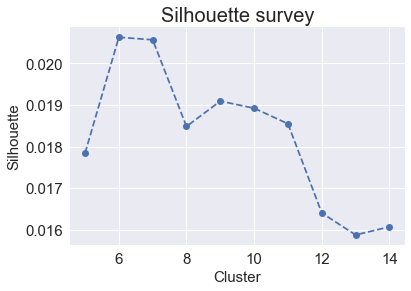

In [109]:

plt.plot([i for i in range(5,15)],lst_sil,'o--')
plt.xlabel('Cluster',fontsize=15)
plt.ylabel('Silhouette',fontsize=15)
plt.yticks(fontsize=15 )
plt.xticks(fontsize=15 )
plt.title('Silhouette survey',fontsize=20)
plt.savefig('Silhouette survey_GMM_resnet.png')
plt.show()

### Jaccard

In [110]:
cluster_GMM_resnet=list(gmm_resnet[10][0]['gmm'])

In [111]:
matrix_JC=Jaccard_score(cluster_GMM_resnet,all_labels)

thu tu label: [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]
cac label gan voi cluster theo thu tu: [1, 3, 5, 4, 6, 0, 2, 9, 8, 7]
JC index tuong ung:
 [0.4820717131474104, 0.7195121951219512, 0.4140401146131805, 0.2642124883504194, 0.47276853252647505, 0.42369186046511625, 0.31894070236039146, 0.6404391582799634, 0.5856255545696539, 0.6785063752276868]
-----000------
thu tu cluster: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
cac cluster gan voi cac label theo thu tu: [5.0, 0.0, 6.0, 1.0, 3.0, 2.0, 4.0, 9.0, 8.0, 7.0]
JC index tuong ung:
 [0.42369186046511625, 0.4820717131474104, 0.31894070236039146, 0.7195121951219512, 0.2642124883504194, 0.4140401146131805, 0.47276853252647505, 0.6785063752276868, 0.5856255545696539, 0.6404391582799634]
*********
matrix Jaccard:
 [[4.10046130e-03 4.82071713e-01 3.24470482e-02 1.63934426e-03
  6.05942142e-02 3.94944708e-02 8.80829016e-03 8.20568928e-03
  2.40687679e-02 4.48179272e-03]
 [0.00000000e+00 7.03844071e-03 7.20636406e-02 7.19512195e-01
  7.80089153e

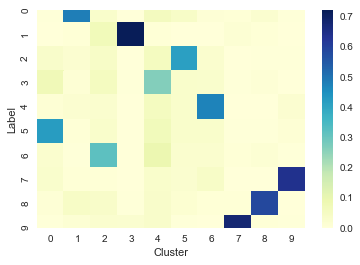

In [113]:
lst=[[i,j,matrix_JC[i][j]] for i in range(10) for j in range(10)]
import pandas as pd 
df = pd.DataFrame(lst, columns =['Label', 'Cluster','Jaccard_score'])
df2 = df.pivot('Label', 'Cluster','Jaccard_score')
ax = sns.heatmap(df2, cmap="YlGnBu")
#Sửa tên hình đã
ax.figure.savefig('JC-heatmap_Resnet_GMM.png')

In [117]:
def nber_points_inlabel(set1,set2):
    a=set(set1)
    b=set(set2)
    T= len(a & b)
    return T
def nber_point(clusters,all_labels):
    nber_real_class = len(set(all_labels))
    nber_clusters = len(set(clusters))
    dct_class={}#dictionary consist of list order of index of each label in range(10000) 
    for i in list(set(all_labels)):
        temp=[j for j,label in enumerate(all_labels) if label == i]
        dct_class[i] = temp
    dct_cluster={}# dictionary of list index of each cluster
    for i in list(set(clusters)):
        temp=[j for j,label in enumerate(clusters) if label == i]
        dct_cluster[i] = temp
    matrix_nberlabel=np.zeros((nber_real_class,nber_clusters))
    for i in range(len(list(set(all_labels)))):
        for j in range(len(list(set(clusters)))):
            matrix_nberlabel[i,j] = nber_points_inlabel(dct_class[list(set(all_labels))[i]],
            dct_cluster[list(set(clusters))[j]])
    return matrix_nberlabel

In [118]:
matrix_nberlabel = nber_point(cluster_GMM_resnet,all_labels)
matrix_nberlabel

array([[  8., 605.,  72.,   3., 155.,  75.,  17.,  15.,  42.,   8.],
       [  0.,  13., 154., 767.,  21.,   1.,   1.,  30.,  13.,   0.],
       [ 69.,  40.,  89.,   0., 151., 578.,  53.,   5.,   8.,   7.],
       [137.,  23., 126.,   6., 567.,  60.,  54.,  10.,  15.,   2.],
       [ 25.,  40.,  62.,   0., 145.,  63., 625.,   1.,   2.,  37.],
       [583.,  11.,  70.,   1., 173.,  60.,  61.,  10.,   8.,  23.],
       [ 53.,   9., 554.,   4., 234.,  50.,  50.,  11.,  26.,   9.],
       [ 58.,  14.,  19.,   2.,  82.,  44.,  75.,   4.,   2., 700.],
       [ 20.,  76.,  84.,   8.,  95.,  33.,  11.,  12., 660.,   1.],
       [  6.,  29.,  61.,  42.,  90.,  10.,   0., 745.,  11.,   6.]])

In [119]:
print(sum(sum(matrix_nberlabel)))
print(sum(matrix_nberlabel))

10000.0
[ 959.  860. 1291.  833. 1713.  974.  947.  843.  787.  793.]


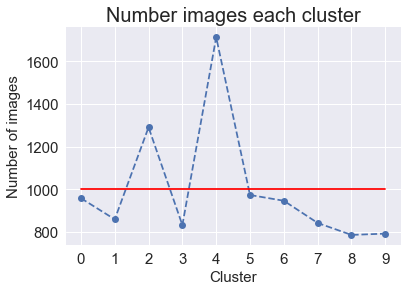

In [120]:

plt.plot([i for i in range(10)],sum(matrix_nberlabel),'o--')
plt.plot([i for i in range(10)],[1000 for _ in range(10)],'r')
plt.xlabel('Cluster',fontsize=15)
plt.ylabel('Number of images',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks([i for i in range(10)],fontsize=15 )
plt.title('Number images each cluster',fontsize=20)
plt.savefig('Number images each cluster_GMM_resnet.png')
plt.show()

## Input 1 ảnh là load ra các ảnh similar

In [121]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [122]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

In [150]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

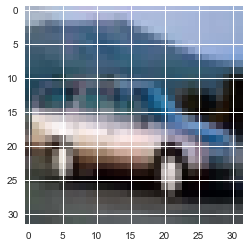

In [148]:

img1=plt.imshow(x_train[4])


In [129]:
vector_5firtst_traindataset=np.load('array_5th_first_trainset.npy')

In [136]:
vector_5firtst_traindataset

array([[0.19836488, 0.17865813, 0.22848874, ..., 0.24826625, 0.21894234,
        0.24536122],
       [0.22069912, 0.20771058, 0.18532284, ..., 0.26481995, 0.21680963,
        0.22465767],
       [0.17690842, 0.22797044, 0.21496028, ..., 0.25852284, 0.24313962,
        0.20447662],
       [0.18573967, 0.21601039, 0.19781858, ..., 0.23442364, 0.26075786,
        0.18815124],
       [0.19614647, 0.19861192, 0.21870852, ..., 0.25797915, 0.2131277 ,
        0.2177871 ]])

In [151]:
embedding_resnet18kind2=np.load('2embedding_dat.npy')

In [166]:
#sửa chỗ embedding đã
kmeans = KMeans(n_clusters=10, random_state=0).fit(embedding_resnet18kind2)
clusters=list(kmeans.labels_)
matrix_JC=Jaccard_score(clusters,all_labels)

thu tu label: [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]
cac label gan voi cluster theo thu tu: [6, 1, 3, 2, 8, 4, 2, 9, 0, 5]
JC index tuong ung:
 [0.4024896265560166, 0.6443478260869565, 0.215234375, 0.2017353579175705, 0.38076923076923075, 0.40639625585023403, 0.16939313984168866, 0.5291666666666667, 0.44409199048374304, 0.4423076923076923]
-----000------
thu tu cluster: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
cac cluster gan voi cac label theo thu tu: [8.0, 1.0, 3.0, 2.0, 5.0, 9.0, 0.0, 9.0, 4.0, 7.0]
JC index tuong ung:
 [0.44409199048374304, 0.6443478260869565, 0.2017353579175705, 0.215234375, 0.40639625585023403, 0.4423076923076923, 0.4024896265560166, 0.15695296523517382, 0.38076923076923075, 0.5291666666666667]
*********
matrix Jaccard:
 [[3.70159453e-02 7.45871071e-03 4.18429713e-02 5.78034682e-02
  7.26256983e-03 8.32266325e-03 4.02489627e-01 4.33379438e-02
  2.10466439e-02 1.10192837e-02]
 [1.39198218e-02 6.44347826e-01 1.88505747e-02 2.57171118e-02
  2.22345748e-03 1.744186

In [153]:
centroids = kmeans.cluster_centers_

In [156]:
centroids

array([[0.19176082, 0.1839437 , 0.17527175, ..., 0.22636167, 0.20294824,
        0.17443232],
       [0.19221952, 0.18395894, 0.18715828, ..., 0.20189173, 0.20106533,
        0.17898561],
       [0.19465979, 0.1878048 , 0.17308598, ..., 0.20656633, 0.21000963,
        0.17537015],
       ...,
       [0.19159153, 0.19078016, 0.1765898 , ..., 0.20944373, 0.20816974,
        0.17768722],
       [0.18809882, 0.18839906, 0.17533539, ..., 0.20667508, 0.20289965,
        0.1799018 ],
       [0.19140959, 0.18672992, 0.18755051, ..., 0.20412982, 0.20579042,
        0.17419614]])

In [154]:
lst_distance=[]
for i in range(10):
    lst_temp=[np.linalg.norm(centroids[i]-vector_5firtst_traindataset[j]) for j in range(5)]
    lst_distance.append(lst_temp)


In [155]:
for i in range(5):
    print(lst_distance[i].index(max(lst_distance[i])))

2
2
2
2
2


## Bắt đầu chỉ nhận file pickle và load ra Silhouette và matrix Jaccard cùng matrix number point


In [165]:
import pickle

with open('rawdata_kmeans_5_50.pkl', 'rb') as f:
    summary = pickle.load(f)

ModuleNotFoundError: No module named 'cupy'

## kmeans phân cụm với nhiều hơn 10 cụm

In [173]:
matrix_nberlabel = nber_point(clusters,all_labels)
matrix_nberlabel

array([[491.,   4.,   6.,  39.,  71.,  16.,   9.,  54.,   5., 275.,  30.],
       [ 10., 779.,   0.,  11.,   1.,   1.,  25., 129.,   0.,  37.,   7.],
       [ 24.,   0.,  78.,   8., 573.,  50.,   0.,  77.,   8., 115.,  67.],
       [ 13.,   5., 100.,  12.,  47.,  31.,   3., 102.,   4., 145., 538.],
       [ 26.,   0.,  23.,   2.,  57., 617.,   0.,  61.,  38., 119.,  57.],
       [  5.,   3., 573.,   8.,  53.,  59.,   1.,  57.,  23., 116., 102.],
       [ 10.,   6.,  60.,  25.,  46.,  39.,   5., 544.,  12., 121., 132.],
       [  7.,   2.,  60.,   1.,  34.,  56.,   1.,  20., 706.,  67.,  46.],
       [ 66.,  10.,  22., 648.,  28.,  12.,   9.,  72.,   1.,  84.,  48.],
       [ 20.,  44.,   6.,  12.,  11.,   0., 683.,  54.,   6., 148.,  16.]])

In [195]:

def check_clustering_resnet18(nber_clus):
    plt.rcParams['figure.figsize'] = (15.0, 10.0)
    plt.rcParams['font.family'] = "serif"
    kmeans = KMeans(n_clusters=nber_clus, random_state=0).fit(embedding_resnet18)
    clusters=list(kmeans.labels_)
    matrix_JC=Jaccard_score(clusters,all_labels)
    #lst=[[i,j,matrix_JC[i][j]] for i in range(10) for j in range(nber_clus)]
    #import pandas as pd 
    #df = pd.DataFrame(lst, columns =['Label', 'Cluster','Jaccard_score'])
    #df2 = df.pivot('Label', 'Cluster','Jaccard_score')
    #ax = sns.heatmap(df2, cmap="YlGnBu")
    #Sửa tên hình đã
    
    matrix_nberlabel = nber_point(clusters,all_labels)
    lst=[[i,j,matrix_nberlabel[i][j]] for i in range(10) for j in range(nber_clus)]
    import pandas as pd 
    df = pd.DataFrame(lst, columns =['Label', 'Cluster','Number_images'])
    df2 = df.pivot('Label', 'Cluster','Number_images')
    ax = sns.heatmap(df2, cmap='coolwarm',
                annot=True,
                fmt=".1f",
                annot_kws={'size':10},
                
                square=True)
    ax.figure.savefig('Nberimages_resnet18'+str(nber_clus)+'.png')

thu tu label: [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]
cac label gan voi cluster theo thu tu: [8, 0, 1, 2, 9, 4, 11, 10, 6, 3]
JC index tuong ung:
 [0.3913808267370273, 0.5632295719844358, 0.40352220520673815, 0.2759179265658747, 0.4808787632221318, 0.4352596927578639, 0.384012539184953, 0.63710407239819, 0.5594470046082949, 0.6289248334919124]
-----000------
thu tu cluster: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
cac cluster gan voi cac label theo thu tu: [1.0, 2.0, 3.0, 9.0, 5.0, 0.0, 8.0, 1.0, 0.0, 4.0, 7.0, 6.0]
JC index tuong ung:
 [0.5632295719844358, 0.40352220520673815, 0.2759179265658747, 0.6289248334919124, 0.4352596927578639, 0.15979955456570155, 0.5594470046082949, 0.24455375966268447, 0.3913808267370273, 0.4808787632221318, 0.63710407239819, 0.384012539184953]
*********
matrix Jaccard:
 [[1.24610592e-03 3.15137873e-02 2.33867475e-02 5.87544066e-03
  3.06748466e-03 1.59799555e-01 2.05066345e-02 2.60718424e-02
  3.91380827e-01 9.98890122e-03 3.32778702e-03 2.1399653

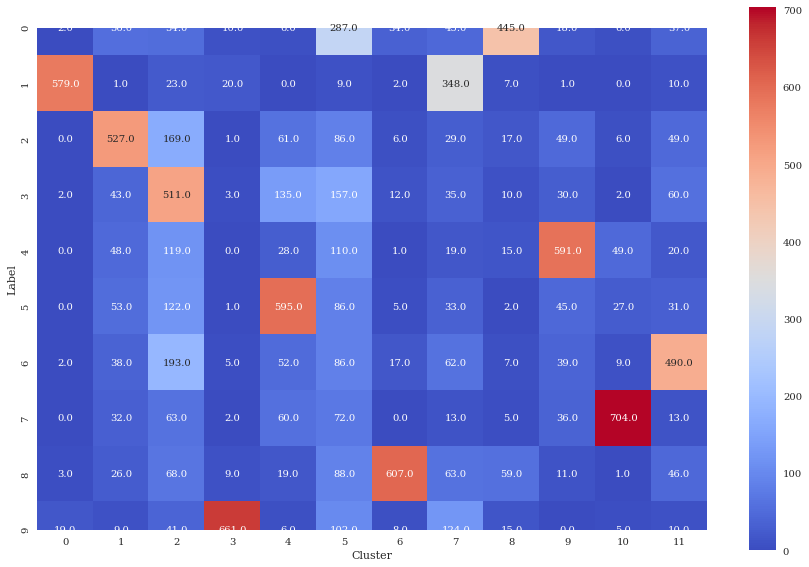

In [196]:
for  clus in range(11,50):
    check_clustering_resnet18(clus)